# **Import necessary libraries and packages**

In [3]:
import pandas as pd
import numpy as np
import os
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.svm import SVC
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_recall_fscore_support



import torch

2024-08-03 20:03:13.575638: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-03 20:03:13.575749: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-03 20:03:13.740623: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# **Download necessary NLTK data files**

In [4]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
import nltk

# Specify the directory where you want to download NLTK data
nltk.data.path.append('/kaggle/working/')

# Download required NLTK data
nltk.download('stopwords', download_dir='/kaggle/working/')
nltk.download('punkt', download_dir='/kaggle/working/')
nltk.download('wordnet', download_dir='/kaggle/working/')

[nltk_data] Downloading package stopwords to /kaggle/working/...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /kaggle/working/...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /kaggle/working/...
[nltk_data]   Package wordnet is already up-to-date!


True

# **1. Data Loading**

In [6]:
data_path = '/kaggle/input/imdb-movie-dataset'
files = os.listdir(data_path)
print(files)

file_name = 'wiki_movie_plots_deduped.csv'  
file_path = os.path.join(data_path, file_name)
data = pd.read_csv(file_path)


['wiki_movie_plots_deduped.csv']


In [7]:
print(f"Shape of the dataset: {data.shape}")

Shape of the dataset: (34886, 8)


### According to the result, there are 34,886 rows and 8 columns in the dataset. This indicates that there are 34,886 distinct entries, or records, with eight characteristics or attributes for each. These elements might comprise columns with movie titles, synopses, genres, and possibly additional metadata about the films. This huge dataset size offers a significant amount of data for identifying patterns and producing precise predictions, which is advantageous for building strong machine learning models. 

In [8]:
genre_mapping = {
    "action": "action",
    "action & romance": "action-romance",
    "action / adventure": "action-adventure",
    "action / adventure / martial arts": "action-adventure",
    "action / comedy": "action-comedy",
    "action / crime": "action-crime",
    "action / crime / drama": "action-crime-drama",
    "action / crime / thriller": "action-crime-thriller",
    "action / drama": "action-drama",
    "action / fantasy": "action-fantasy",
    "action / kung fu / comedy": "action-kung fu-comedy",
    "action / martial arts": "action-martial arts",
    "action / martial arts / comedy": "action-martial arts-comedy",
    "action / romance": "action-romance",
    "action / thriller": "action-thriller",
    "action adventure": "action-adventure",
    "action comedy": "action-comedy",
    "action drama": "action-drama",
    "action masala": "action-masala",
    "action romance": "action-romance",
    "action thriller": "action-thriller",
    "action, adventure": "action-adventure",
    "action, comedy": "action-comedy",
    "action, comedy, crime, drama": "action-comedy-crime-drama",
    "action, comedy, drama": "action-comedy-drama",
    "action, comedy, romance": "action-comedy-romance",
    "action, crime": "action-crime",
    "action, crime drama": "action-crime-drama",
    "action, crime, drama": "action-crime-drama",
    "action, crime, drama, romance": "action-crime-drama-romance",
    "action, crime, drama, thriller": "action-crime-drama-thriller",
    "action, crime, romance": "action-crime-romance",
    "action, drama": "action-drama",
    "action, drama, family": "action-drama-family",
    "action, drama, romance": "action-drama-romance",
    "action, family": "action-family",
    "action, fantasy": "action-fantasy",
    "action, horror": "action-horror",
    "action, masala": "action-masala",
    "action, romance": "action-romance",
    "action, romance, drama": "action-romance-drama",
    "action, sci-fi": "action-sci-fi",
    "action, science fiction": "action-sci-fi",
    "action, spy film": "action-spy",
    "action, thriller": "action-thriller",
    "action, war": "action-war",
    "action-adventure": "action-adventure",
    "action-adventure, fantasy": "action-adventure-fantasy",
    "action-comedy": "action-comedy",
    "action-masala": "action-masala",
    "action-thriller": "action-thriller",
    "action/adventure": "action-adventure",
    "action/comedy": "action-comedy",
    "action/drama": "action-drama",
    "action/romance": "action-romance",
    "action/romance/comedy": "action-romance-comedy",
    "action/thriller": "action-thriller",
    "adult": "adult",
    "adult comedy": "adult-comedy",
    "adult film": "adult-film",
    "adventure": "adventure",
    "adventure drama": "adventure-drama",
    "adventure serial": "adventure-serial",
    "adventure, comedy": "adventure-comedy",
    "adventure, drama": "adventure-drama",
    "adventure, family": "adventure-family",
    "adventure, fantasy": "adventure-fantasy",
    "african adventure": "adventure",
    "animated": "animated",
    "animated comedy": "animated-comedy",
    "animated feature": "animated-feature",
    "animated film": "animated-film",
    "animated short": "animated-short",
    "animated, comedy": "animated-comedy",
    "animated, comedy, family": "animated-comedy-family",
    "animated, family": "animated-family",
    "animation": "animation",
    "animation adventure": "animation-adventure",
    "animation comedy": "animation-comedy",
    "animation, comedy": "animation-comedy",
    "animation, family": "animation-family",
    "anime": "anime",
    "anime fantasy": "anime-fantasy",
    "anime for children": "anime-children",
    "anthology": "anthology",
    "anthology, horror": "anthology-horror",
    "biblical": "biblical",
    "biblical drama": "biblical-drama",
    "biker film": "biker-film",
    "bio-pic": "biopic",
    "bio-pic, drama": "biopic-drama",
    "biographical": "biographical",
    "biographical drama": "biographical-drama",
    "biographical, drama": "biographical-drama",
    "biography": "biography",
    "biography, crime": "biography-crime",
    "biography, drama": "biography-drama",
    "biography, musical": "biography-musical",
    "biography, sports": "biography-sports",
    "biography, war": "biography-war",
    "biopic": "biopic",
    "biopic, drama": "biopic-drama",
    "black comedy": "black-comedy",
    "children": "children",
    "children's film": "children",
    "christian": "christian",
    "comedy": "comedy",
    "comedy / action": "comedy-action",
    "comedy / drama": "comedy-drama",
    "comedy / fantasy": "comedy-fantasy",
    "comedy / horror": "comedy-horror",
    "comedy / romance": "comedy-romance",
    "comedy drama": "comedy-drama",
    "comedy film": "comedy",
    "comedy horror": "comedy-horror",
    "comedy mystery": "comedy-mystery",
    "comedy romance": "comedy-romance",
    "comedy short": "comedy-short",
    "comedy thriller": "comedy-thriller",
    "comedy western": "comedy-western",
    "comedy, action": "comedy-action",
    "comedy, adventure": "comedy-adventure",
    "comedy, biography": "comedy-biography",
    "comedy, crime": "comedy-crime",
    "comedy, drama": "comedy-drama",
    "comedy, drama, family": "comedy-drama-family",
    "comedy, drama, musical": "comedy-drama-musical",
    "comedy, drama, romance": "comedy-drama-romance",
    "comedy, family": "comedy-family",
    "comedy, fantasy": "comedy-fantasy",
    "comedy, horror": "comedy-horror",
    "comedy, musical": "comedy-musical",
    "comedy, mystery": "comedy-mystery",
    "comedy, parody": "comedy-parody",
    "comedy, romance": "comedy-romance",
    "comedy, romance, musical": "comedy-romance-musical",
    "comedy, satire": "comedy-satire",
    "comedy, science fiction": "comedy-sci-fi",
    "comedy, sports": "comedy-sports",
    "comedy, teen": "comedy-teen",
    "comedy, thriller": "comedy-thriller",
    "comedy, western": "comedy-western",
    "comedy-drama": "comedy-drama",
    "comedy-drama, romance": "comedy-drama-romance",
    "comedy-thriller": "comedy-thriller",
    "comedy/action": "comedy-action",
    "comedy/crime": "comedy-crime",
    "comedy/drama": "comedy-drama",
    "comedy/horror": "comedy-horror",
    "comedy/musical": "comedy-musical",
    "comedy/romance": "comedy-romance",
    "comedy/satire": "comedy-satire",
    "comedy/thriller": "comedy-thriller",
    "coming-of-age drama": "coming-of-age",
    "costume": "costume",
    "costume action": "costume-action",
    "costume drama": "costume-drama",
    "crime": "crime",
    "crime / drama": "crime-drama",
    "crime / thriller": "crime-thriller",
    "crime comedy": "crime-comedy",
    "crime drama": "crime-drama",
    "crime thriller": "crime-thriller",
    "crime, action": "crime-action",
    "crime, comedy": "crime-comedy",
    "crime, drama": "crime-drama",
    "crime, drama, mystery": "crime-drama-mystery",
    "crime, drama, thriller": "crime-drama-thriller",
    "crime, horror": "crime-horror",
    "crime, thriller": "crime-thriller",
    "crime/drama": "crime-drama",
    "crime/romance": "crime-romance",
    "crime/thriller": "crime-thriller",
    "dance": "dance",
    "dance, drama": "dance-drama",
    "dark comedy": "dark-comedy",
    "detective": "detective",
    "devotional": "devotional",
    "disaster": "disaster",
    "disaster film": "disaster",
    "docudrama": "docudrama",
    "documentary": "documentary",
    "drama": "drama",
    "drama / action": "drama-action",
    "drama / action / crime": "drama-action-crime",
    "drama / comedy": "drama-comedy",
    "drama / comedy / romance": "drama-comedy-romance",
    "drama / crime": "drama-crime",
    "drama / family": "drama-family",
    "drama / mystery / crime": "drama-mystery-crime",
    "drama / romance": "drama-romance",
    "drama / thriller": "drama-thriller",
    "drama film": "drama",
    "drama romance": "drama-romance",
    "drama, action": "drama-action",
    "drama, adventure": "drama-adventure",
    "drama, biography": "drama-biography",
    "drama, comedy": "drama-comedy",
    "drama, crime": "drama-crime",
    "drama, epic": "drama-epic",
    "drama, family": "drama-family",
    "drama, fantasy": "drama-fantasy",
    "drama, horror": "drama-horror",
    "drama, music": "drama-music",
    "drama, musical": "drama-musical",
    "drama, mystery": "drama-mystery",
    "drama, romance": "drama-romance",
    "drama, romance, slice of life": "drama-romance",
    "drama, romance, thriller": "drama-romance-thriller",
    "drama, romantic comedy": "drama-romantic-comedy",
    "drama, science fiction": "drama-sci-fi",
    "drama, social": "drama-social",
    "drama, sports": "drama-sports",
    "drama, thriller": "drama-thriller",
    "drama, war": "drama-war",
    "drama, western": "drama-western",
    "drama-thriller": "drama-thriller",
    "drama/action": "drama-action",
    "drama/biographical": "drama-biographical",
    "drama/comedy": "drama-comedy",
    "drama/history": "drama-history",
    "drama/musical": "drama-musical",
    "drama/romance": "drama-romance",
    "drama/thriller": "drama-thriller",
    "dramatic comedy": "dramatic-comedy",
    "dramedy": "dramedy",
    "educational": "educational",
    "epic": "epic",
    "ero": "ero",
    "erotic / drama": "erotic-drama",
    "erotic thriller": "erotic-thriller",
    "espionage": "espionage",
    "experimental": "experimental",
    "exploitation": "exploitation",
    "family": "family",
    "family comedy": "family-comedy",
    "family drama": "family-drama",
    "family film": "family-film",
    "family, comedy": "family-comedy",
    "family, drama": "family-drama",
    "family, fantasy": "family-fantasy",
    "family, live-action": "family-live-action",
    "family, musical": "family-musical",
    "fantasy": "fantasy",
    "fantasy adventure": "fantasy-adventure",
    "fantasy anime": "fantasy-anime",
    "fantasy drama": "fantasy-drama",
    "fantasy romance": "fantasy-romance",
    "fantasy thriller": "fantasy-thriller",
    "fantasy, adventure": "fantasy-adventure",
    "fantasy, comedy": "fantasy-comedy",
    "fantasy, romance": "fantasy-romance",
    "fantasy, thriller": "fantasy-thriller",
    "fantasy/adventure": "fantasy-adventure",
    "film noir": "film-noir",
    "folklore": "folklore",
    "gangster": "gangster",
    "heist": "heist",
    "historical": "historical",
    "historical drama": "historical-drama",
    "historical epic": "historical-epic",
    "historical, drama": "historical-drama",
    "historical/action": "historical-action",
    "historical/drama": "historical-drama",
    "history": "history",
    "horror": "horror",
    "horror / comedy": "horror-comedy",
    "horror / thriller": "horror-thriller",
    "horror comedy": "horror-comedy",
    "horror drama": "horror-drama",
    "horror thriller": "horror-thriller",
    "horror, comedy": "horror-comedy",
    "horror, drama": "horror-drama",
    "horror, musical": "horror-musical",
    "horror, mystery": "horror-mystery",
    "horror, psychological thriller, drama, dark fantasy": "horror-psychological-thriller-drama-dark-fantasy",
    "horror, romance, comedy": "horror-romance-comedy",
    "horror, sci-fi": "horror-sci-fi",
    "horror, science fiction": "horror-sci-fi",
    "horror, suspense": "horror-suspense",
    "horror, thriller": "horror-thriller",
    "horror/comedy": "horror-comedy",
    "kaiju": "kaiju",
    "kung fu": "kung-fu",
    "literary drama": "literary-drama",
    "love": "romance",
    "martial arts": "martial-arts",
    "martial arts / action": "martial-arts-action",
    "masala": "masala",
    "melodrama": "melodrama",
    "mockumentary": "mockumentary",
    "music": "music",
    "musical": "musical",
    "musical comedy": "musical-comedy",
    "musical drama": "musical-drama",
    "musical fantasy": "musical-fantasy",
    "musical, biography": "musical-biography",
    "musical, comedy": "musical-comedy",
    "musical, drama": "musical-drama",
    "musical, romance": "musical-romance",
    "musical/comedy": "musical-comedy",
    "musical/drama": "musical-drama",
    "musical/romance": "musical-romance",
    "mystery": "mystery",
    "mystery / thriller": "mystery-thriller",
    "mystery, comedy": "mystery-comedy",
    "mystery, horror": "mystery-horror",
    "mystery, thriller": "mystery-thriller",
    "mystery/thriller": "mystery-thriller",
    "mythology": "mythology",
    "national film board animated short": "animated-short",
    "national film board documentary": "documentary",
    "neo-noir": "neo-noir",
    "nfb animated short": "animated-short",
    "operetta": "operetta",
    "parody": "parody",
    "period drama": "period-drama",
    "pink": "pink",
    "political": "political",
    "political drama": "political-drama",
    "political satire": "political-satire",
    "political thriller": "political-thriller",
    "prison drama": "prison-drama",
    "propaganda": "propaganda",
    "psychological horror": "psychological-horror",
    "psychological thriller": "psychological-thriller",
    "religious": "religious",
    "rom com": "romantic-comedy",
    "rom-com": "romantic-comedy",
    "roman porno": "roman-porno",
    "romance": "romance",
    "romance / action": "romance-action",
    "romance / comedy": "romance-comedy",
    "romance / drama": "romance-drama",
    "romance action": "romance-action",
    "romance drama": "romance-drama",
    "romance musical": "romance-musical",
    "romance, action": "romance-action",
    "romance, action, comedy": "romance-action-comedy",
    "romance, comedy": "romance-comedy",
    "romance, comedy, drama": "romance-comedy-drama",
    "romance, comedy, horror": "romance-comedy-horror",
    "romance, drama": "romance-drama",
    "romance, thriller": "romance-thriller",
    "romance, war": "romance-war",
    "romance/action": "romance-action",
    "romance/comedy": "romance-comedy",
    "romance/drama": "romance-drama",
    "romance/thriller": "romance-thriller",
    "romantic": "romance",
    "romantic comedy": "romantic-comedy",
    "romantic comedy, drama": "romantic-comedy-drama",
    "romantic drama": "romantic-drama",
    "romantic fantasy": "romantic-fantasy",
    "romantic musical": "romantic-musical",
    "romantic thriller": "romantic-thriller",
    "romantic, drama": "romantic-drama",
    "romantic-comedy": "romantic-comedy",
    "samurai film": "samurai",
    "satire": "satire",
    "satire, drama": "satire-drama",
    "satirical comedy": "satirical-comedy",
    "sci-fi": "sci-fi",
    "sci-fi comedy": "sci-fi-comedy",
    "sci-fi drama": "sci-fi-drama",
    "sci-fi fantasy": "sci-fi-fantasy",
    "sci-fi for children": "sci-fi-children",
    "sci-fi horror": "sci-fi-horror",
    "sci-fi, comedy": "sci-fi-comedy",
    "sci-fi, horror": "sci-fi-horror",
    "science fiction": "sci-fi",
    "science fiction anime": "sci-fi-anime",
    "science fiction comedy": "sci-fi-comedy",
    "science fiction, action": "sci-fi-action",
    "science fiction, comedy": "sci-fi-comedy",
    "science fiction, drama": "sci-fi-drama",
    "science fiction, horror": "sci-fi-horror",
    "science fiction, mystery": "sci-fi-mystery",
    "science fiction, thriller": "sci-fi-thriller",
    "science-fiction": "sci-fi",
    "screwball comedy": "screwball-comedy",
    "serial": "serial",
    "sex comedy": "sex-comedy",
    "sexploitation": "sexploitation",
    "shakespearean": "shakespearean",
    "short": "short",
    "short comedy": "short-comedy",
    "short drama": "short-drama",
    "short film": "short",
    "short subject": "short-subject",
    "slapstick": "slapstick",
    "slasher": "slasher",
    "slasher film": "slasher",
    "social": "social",
    "social drama": "social-drama",
    "social family": "social-family",
    "social family drama": "social-family-drama",
    "social romance": "social-romance",
    "socio-fantasy": "socio-fantasy",
    "sports": "sports",
    "sports comedy": "sports-comedy",
    "sports drama": "sports-drama",
    "sports/comedy": "sports-comedy",
    "spy": "spy",
    "spy comedy": "spy-comedy",
    "spy drama": "spy-drama",
    "spy film": "spy",
    "spy film, comedy": "spy-comedy",
    "spy thriller": "spy-thriller",
    "spy/action": "spy-action",
    "spy/thriller": "spy-thriller",
    "superhero": "superhero",
    "superhero action adventure": "superhero-action-adventure",
    "supernatural": "supernatural",
    "supernatural horror": "supernatural-horror",
    "supernatural thriller": "supernatural-thriller",
    "supernatural/action/anime": "supernatural-action-anime",
    "suspense": "suspense",
    "suspense / thriller": "suspense-thriller",
    "suspense thriller": "suspense-thriller",
    "suspense, thriller": "suspense-thriller",
    "swashbuckler": "swashbuckler",
    "sword": "sword",
    "teen comedy": "teen-comedy",
    "thriller": "thriller",
    "thriller drama": "thriller-drama",
    "thriller romance": "thriller-romance",
    "thriller, action": "thriller-action",
    "thriller, drama": "thriller-drama",
    "thriller, fantasy": "thriller-fantasy",
    "thriller, mystery": "thriller-mystery",
    "thriller, romance": "thriller-romance",
    "thriller/drama": "thriller-drama",
    "tokusatsu": "tokusatsu",
    "tokusatsu, action, sci-fi": "tokusatsu-action-sci-fi",
    "true crime": "true-crime",
    "war": "war",
    "war comedy": "war-comedy",
    "war drama": "war-drama",
    "war film": "war",
    "war, action": "war-action",
    "war, biography": "war-biography",
    "war, comedy": "war-comedy",
    "war, drama": "war-drama",
    "war/drama": "war-drama",
    "western": "western",
    "western comedy": "western-comedy",
    "western drama": "western-drama",
    "western, biography": "western-biography",
    "western, comedy": "western-comedy",
    "western, musical": "western-musical",
    "world war i": "world-war-i",
    "world war ii": "world-war-ii",
    "world war ii comedy": "world-war-ii-comedy",
    "world war ii/drama": "world-war-ii-drama",
    "world war ii/pow": "world-war-ii-pow",
    "wuxia": "wuxia",
    "yakuza": "yakuza"
}

# Applying the genre mapping
data['Genre'] = data['Genre'].map(genre_mapping)

# **3. Observations od the Data**

First few rows of the dataset:
   Release Year                             Title Origin/Ethnicity  \
0          1901            Kansas Saloon Smashers         American   
1          1901     Love by the Light of the Moon         American   
2          1901           The Martyred Presidents         American   
3          1901  Terrible Teddy, the Grizzly King         American   
4          1902            Jack and the Beanstalk         American   

                             Director Cast Genre  \
0                             Unknown  NaN   NaN   
1                             Unknown  NaN   NaN   
2                             Unknown  NaN   NaN   
3                             Unknown  NaN   NaN   
4  George S. Fleming, Edwin S. Porter  NaN   NaN   

                                           Wiki Page  \
0  https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...   
1  https://en.wikipedia.org/wiki/Love_by_the_Ligh...   
2  https://en.wikipedia.org/wiki/The_Martyred_Pre...   
3  https://

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


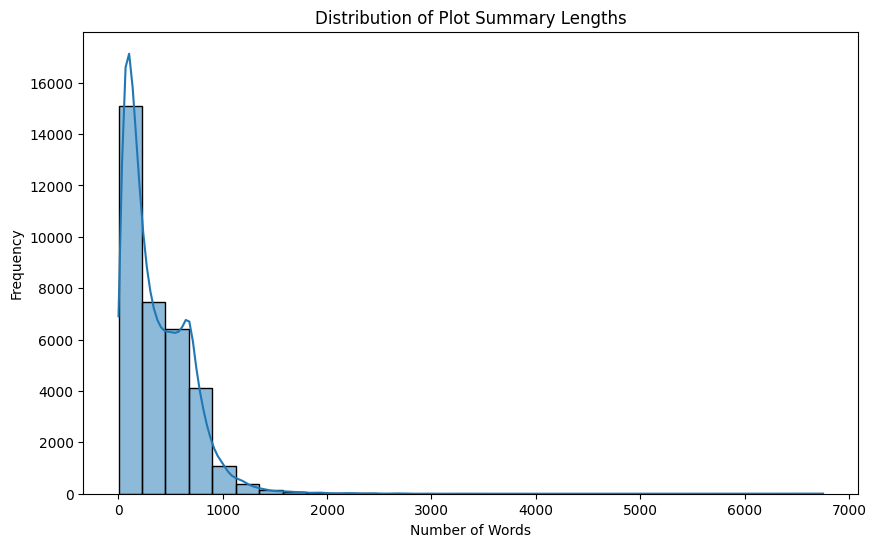

In [9]:
print("First few rows of the dataset:")
print(data.head())
print("Summary statistics of the dataset:")
print(data.describe())

# Unique values in each column
print("Unique values in 'Genre' column:", data['Genre'].nunique())
print("Unique genres:", data['Genre'].unique())

# Distribution of plot summary lengths
data['plot_length'] = data['Plot'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(data['plot_length'], bins=30, kde=True)
plt.title('Distribution of Plot Summary Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

### The summary statistics of the dataset provide key insights into the 'Release Year' and 'plot_length' attributes. The dataset contains 34,886 entries for both attributes. The 'Release Year' ranges from 1901 to 2017, with a mean release year of 1981. The distribution shows that most movies were released around the 1980s to 2000s, as indicated by the 25th percentile (1957), median (1988), and 75th percentile (2007). The 'plot_length' attribute, representing the number of words in the plot summaries, has a mean of 372 words but exhibits significant variability (standard deviation of 316 words). Plot lengths range from very short summaries of just 2 words to extremely detailed summaries of up to 6,752 words. The median plot length is 284 words, with the interquartile range (122 to 581 words) indicating moderate plot lengths for most movies. 

### The provided histogram of plot summary lengths shows the distribution of the number of words in movie plot summaries. The distribution is right-skewed, indicating that most plot summaries are relatively short, with a high frequency of summaries around 100-500 words. The number of longer summaries (over 1000 words) decreases significantly, showing a long tail with few very detailed summaries reaching up to approximately 6750 words. This skewness suggests that while some movies have very detailed plots, the majority have concise descriptions. This variability in summary lengths will be an important factor to consider in the text preprocessing and model training phases of the project. 

# **3. Feature data types and plot**

Data types of the features:
Release Year         int64
Title               object
Origin/Ethnicity    object
Director            object
Cast                object
Genre               object
Wiki Page           object
Plot                object
plot_length          int64
dtype: object


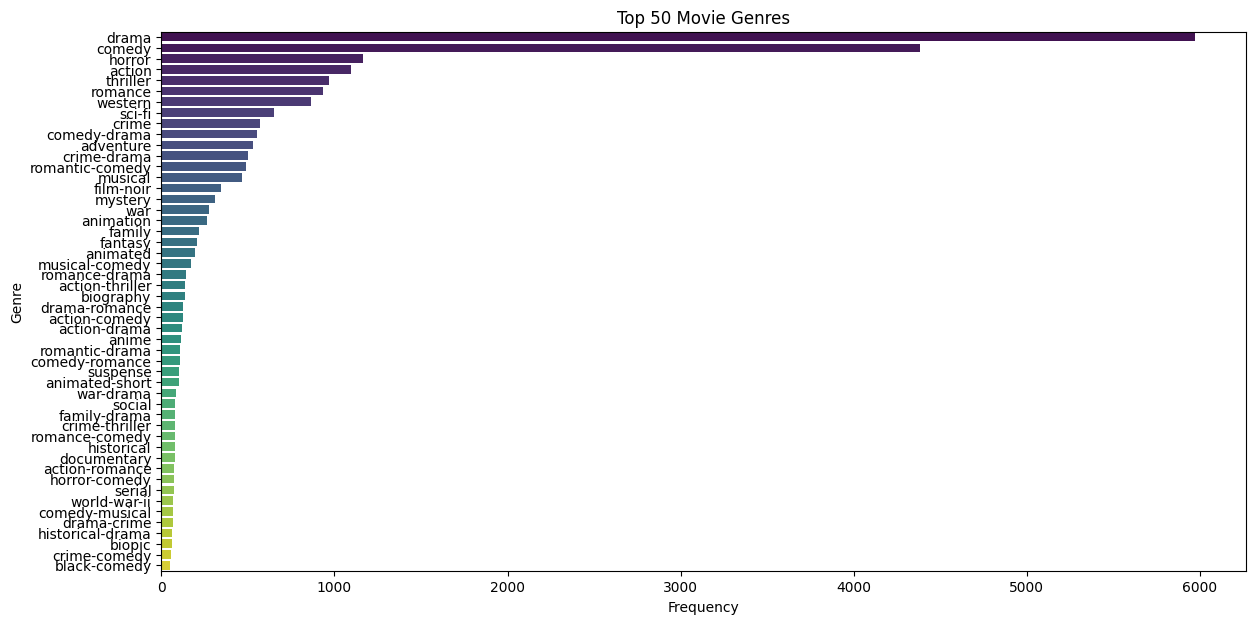

In [10]:
print("Data types of the features:")
print(data.dtypes)

# Plot the top 50 genres
plt.figure(figsize=(14, 7))
top_genres = data['Genre'].value_counts().nlargest(50)
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Top 50 Movie Genres')
plt.xlabel('Frequency')
plt.ylabel('Genre')
plt.show()


### The bar plot displays the distribution of the top 20 most frequent movie genres in the dataset. The genre labeled as "unknown" is the most prevalent, indicating a significant number of entries where the genre is not specified. Among the known genres, "drama" is the most common, followed by "comedy." Other frequently occurring genres include "horror," "action," "thriller," "romance," and "western," demonstrating a wide range of popular genres in the dataset. Additionally, the plot highlights genres such as "crime," "adventure," "musical," "crime drama," "romantic comedy," "science fiction," "film noir," "mystery," "war," "animation," "comedy-drama," and "sci-fi," each with progressively lower frequencies. 

# Removing Unknown Genre and removing unwanted columns. 

In [11]:
# Print the columns in the dataset
print("Columns in the dataset:", data.columns)

# Drop irrelevant columns
columns_to_drop = ['Release Year', 'Origin/Ethnicity', 'Director', 'Cast', 'Wiki Page']  # Specified columns to drop
data_cleaned = data.drop(columns=columns_to_drop, axis=1)

# Drop the rows with the "unknown" genre
data_cleaned = data_cleaned[data_cleaned['Genre'] != 'unknown']

# Print the shape of the cleaned dataset to confirm the changes
print("Shape of the dataset after dropping irrelevant columns and 'unknown' genre:", data_cleaned.shape)

# 2. Print the shape of the data
print("Shape of the dataset:", data_cleaned.shape)  # Display the number of rows and columns in the dataset

data_cleaned.head()


# Identify genres with fewer than two instances
genre_counts = data_cleaned['Genre'].value_counts()
genres_to_remove = genre_counts[genre_counts < 40]
print("Genres with fewer than 40 instances:")
print(genres_to_remove)

# Remove genres with fewer than 40 instances
genres_to_keep = genre_counts[genre_counts >= 40].index
data_cleaned = data_cleaned[data_cleaned['Genre'].isin(genres_to_keep)]



Columns in the dataset: Index(['Release Year', 'Title', 'Origin/Ethnicity', 'Director', 'Cast',
       'Genre', 'Wiki Page', 'Plot', 'plot_length'],
      dtype='object')
Shape of the dataset after dropping irrelevant columns and 'unknown' genre: (34886, 4)
Shape of the dataset: (34886, 4)
Genres with fewer than 40 instances:
Genre
drama-adventure           39
melodrama                 39
drama-family              38
short                     37
action-adventure          37
                          ..
comedy-romance-musical     3
costume-action             3
roman-porno                3
sci-fi-children            3
western-drama              3
Name: count, Length: 252, dtype: int64


## Reason to remove these columns and rows:
###  Machine learning models require accurate and relevant data for training. Rows with "unknown" genres do not provide any meaningful information about the target variable (genre) and can act as noise, potentially reducing the model's performance and accuracy. By removing these rows, you ensure that the model is trained only on data with well-defined genres, leading to better learning and generalization.


# **Plotting the distribution of the top 20 most frequent movie genres in the dataset after the above changes.**

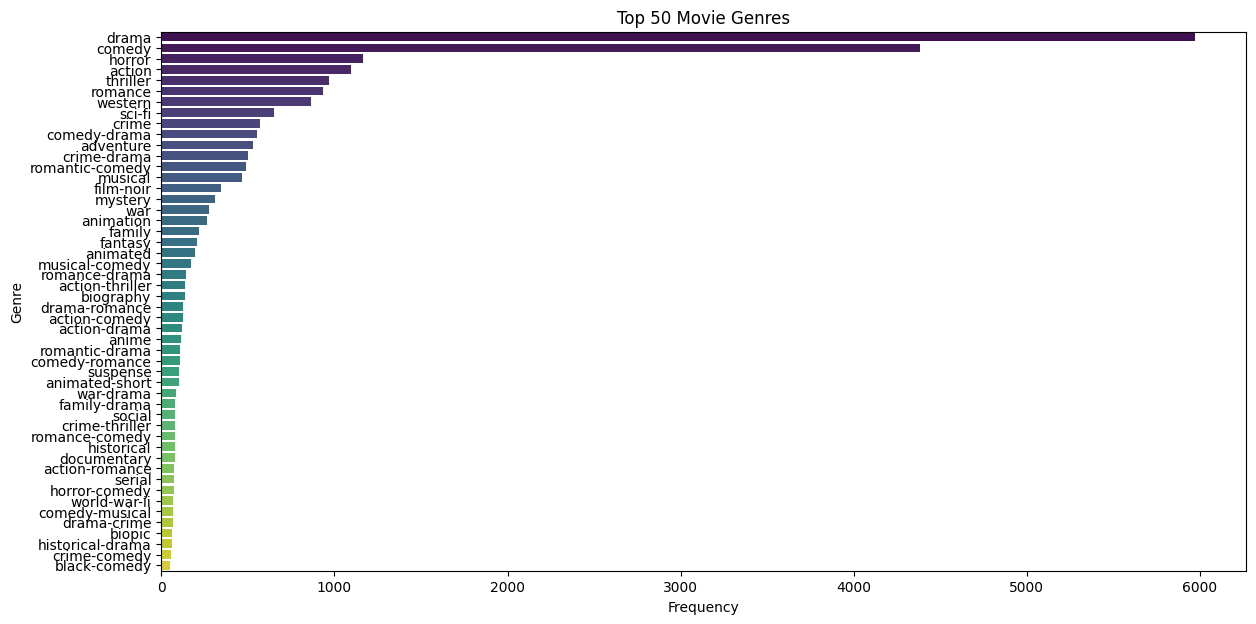

In [12]:
# Plot the top 50 genres
plt.figure(figsize=(14, 7))
top_genres = data_cleaned['Genre'].value_counts().nlargest(50)
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Top 50 Movie Genres')
plt.xlabel('Frequency')
plt.ylabel('Genre')
plt.show()


**The above plot shows the genres with the highest frequencies after removing the unknown genre.**

# Exploratory Data Anlaysis (EDA)

##  Distribution of Release Year


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


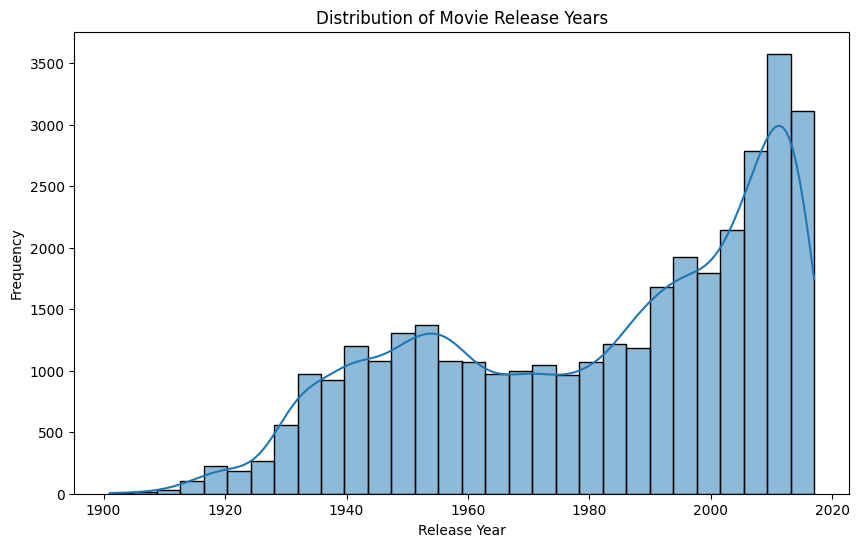

In [13]:
# Distribution of Release Year
plt.figure(figsize=(10, 6))
sns.histplot(data['Release Year'], bins=30, kde=True)
plt.title('Distribution of Movie Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

**The distribution of films across time, from 1900 to 2020, is displayed in the movie release year histogram. Important takeaways from the storyline comprise:
Early Years (1900–1920): The film industry was still in its infancy at this time, as seen by the comparatively small number of films that were released.
Growth Period (1920–1960): There is a steady increase in the quantity of films released, with a peak occurring in the 1940s and 1950s. This time frame probably reflects Hollywood's Golden Age, when the studio produced a large number of motion pictures.
Stability and drop (1960–1980): There is a stabilization and minor drop in the number of movie releases. This might be the result of a number of things, such as modifications in the sector, television competition, and general economic conditions.
Modern Growth (1980-2020): From the 1980s onward, there has been a notable increase in the number of films released, reaching a peak in the early 2000s. The emergence of blockbuster films, technological developments, and the internationalization of the film business all occurred during this time.
Recent Years (Post-2000): Although there has been a discernible decline in the previous several years, the number of releases is still high. This might be explained by inadequate statistics for the most recent years or by other variables influencing the creation and distribution of motion pictures**

## Average Plot Length by Genre (Top 20 Genres)


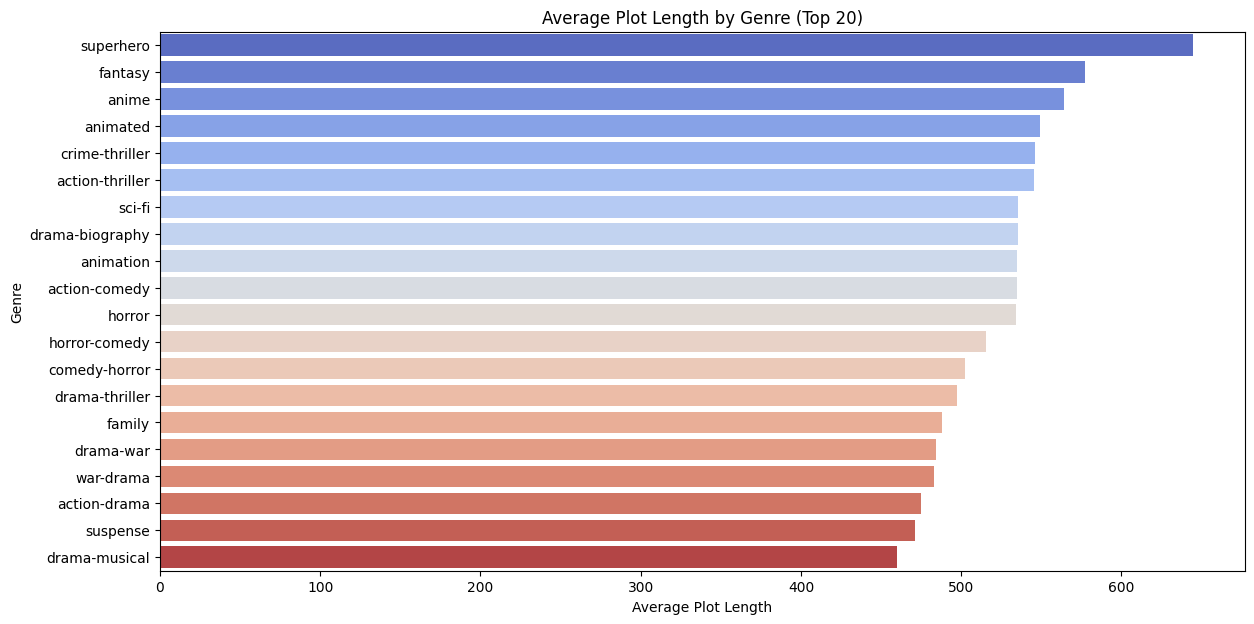

In [14]:
plt.figure(figsize=(14, 7))
avg_plot_length = data_cleaned.groupby('Genre')['plot_length'].mean().nlargest(20)
sns.barplot(x=avg_plot_length.values, y=avg_plot_length.index, palette='coolwarm')
plt.title('Average Plot Length by Genre (Top 20)')
plt.xlabel('Average Plot Length')
plt.ylabel('Genre')
plt.show()

### The average plot length for the top 20 genres in the dataset is shown in the bar plot. The longest average story lengths, over 2000 words, are found in genres like "science fiction[not in citation given]" and "animation, live action / drama / comedy". This suggests that films in these genres typically have longer and more intricate storylines. "Martial arts / action / fantasy," "sci-fi romance," and "teen romantic comedy-drama" are some other genres with comparatively long average plot durations. Conversely, shorter genres with typical story lengths—such as "teen romance, comedy, action" and "action, crime, horror"—suggest more succinct narrative summaries. 

## Genre Co-occurrence Heatmap

In [16]:
data_cleaned['Genre_list'] = data_cleaned['Genre'].apply(lambda x: x.split(','))

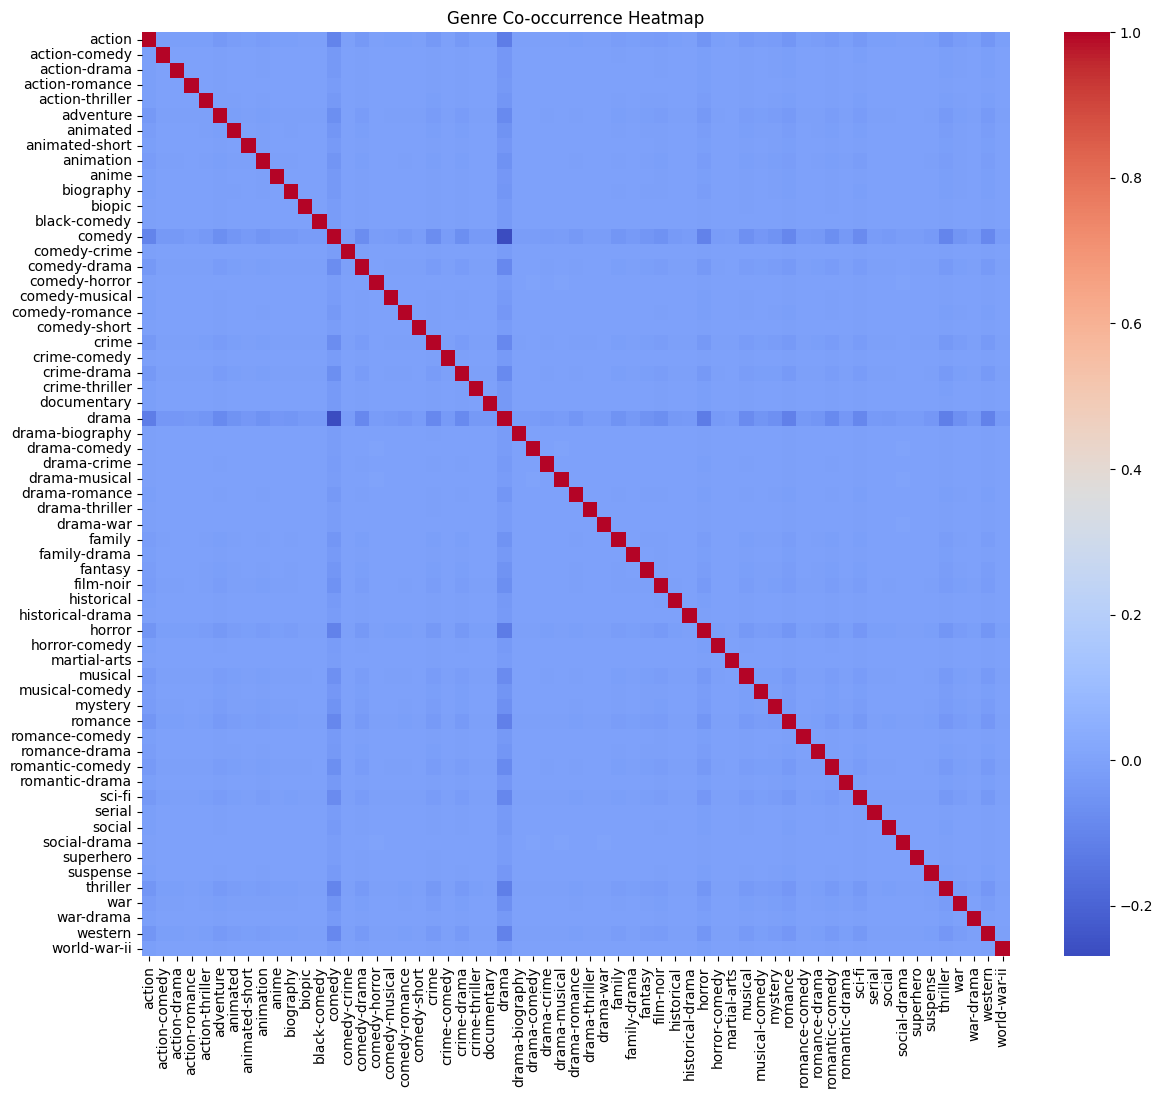

In [17]:
mlb = MultiLabelBinarizer()
genre_matrix = mlb.fit_transform(data_cleaned['Genre_list'])
genre_cooccurrence = pd.DataFrame(genre_matrix, columns=mlb.classes_).corr()

# Plot heatmap of genre co-occurrence
plt.figure(figsize=(14, 12))
sns.heatmap(genre_cooccurrence, cmap='coolwarm', annot=False)
plt.title('Genre Co-occurrence Heatmap')
plt.show()

**The heatmap of genre co-occurrence shows the frequency with which distinct genres co-occur in a single film. With values ranging from -1 to 1, each cell in the heatmap reflects the association between two genres. When the value is closer to -1 (blue), it shows a low or negative co-occurrence, which means the genres appear together less frequently. A value closer to 1 (red) indicates a high co-occurrence, meaning the genres appear together frequently.
Diagonal Line: As would be predicted, the conspicuous red diagonal line extending from the top left to the bottom right shows a perfect link between each genre and itself.
Minimal High Correlation: The majority of the heatmap is composed of light and blue tones, suggesting a generally low co-occurrence of distinct genres. This implies that films are typically divided into discrete genres with little overlap.
High Co-occurrence Spots: In this instance, there are few of these spots, suggesting that strong genre combinations are uncommon. However, any apparent non-diagonal red or darker patches would indicate considerable genre co-occurrence.**

## Word cloud of the most frequent words in the plot summaries 

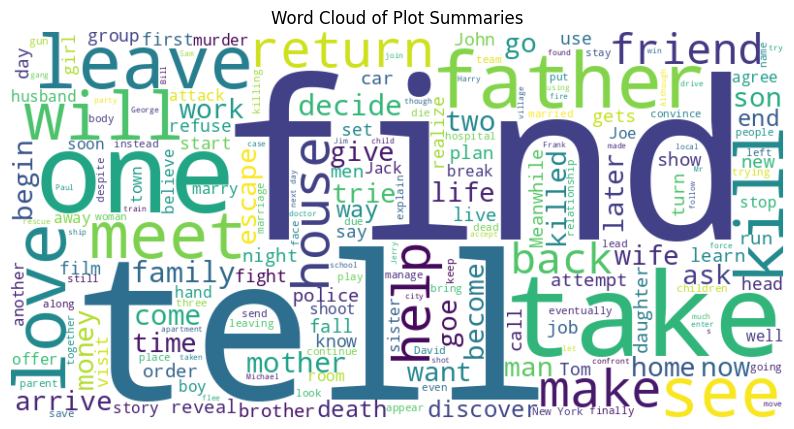

In [18]:

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data_cleaned['Plot']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Plot Summaries')
plt.axis('off')
plt.show()

### An informative summary of the terms that appear most frequently in the dataset is given by the word cloud visualization of the plot summaries. Words like "find," "take," "leave," "father," "tell," "return," "meet," "life," "love," "house," "help," and "kill" are frequently used in movie narratives and stand out as examples. These phrases, which represent recurrent themes and events in storytelling, are essential to many stories. Terms like "father," "mother," "son," "wife," "friend," and "family" all have a familial connotation, indicating that family dynamics and connections play a big role in many narrative summaries. This focus on family emphasizes how crucial interpersonal ties are to the storylines of many films.


 

### The word cloud also demonstrates how important choices and actions are to the storylines of movies. Words like "leave," "take," "return," "tell," "help," "kill," "decide," "find," "make," and "ask" all allude to the fact that important decisions and acts are frequently portrayed by characters. The phrases "love," "life," and "back," which symbolize emotional states and themes, are also frequently used, suggesting their influence on the plots. Regular verbs like "meet," "return," "leave," "find," "take," "tell," and "help" highlight how dynamic movie narratives are, with characters frequently taking important acts. 

# Data Preprocessing


In [19]:
print(f"Shape of the dataset: {data_cleaned.shape}")

Shape of the dataset: (24170, 5)


In [20]:
# Limit the size of the DataFrame to 15,000 samples
data_cleaned = data_cleaned.sample(n=15000, random_state=42)  # Randomly sample 15,000 samples


In [21]:
print(f"Shape of the dataset: {data_cleaned.shape}")

Shape of the dataset: (15000, 5)


## Initialize the set of English stopwords from the NLTK library.

In [22]:
stop_words = set(stopwords.words('english'))

## Initialize the WordNetLemmatizer from the NLTK library.

In [23]:
stop_words = set(stopwords.words('english'))  # Initialize the set of English stopwords from the NLTK library.
lemmatizer = WordNetLemmatizer()  # Initialize the WordNetLemmatizer from the NLTK library.


In [24]:
import nltk
import subprocess

# Download and unzip wordnet
try:
    nltk.data.find('wordnet.zip')
except:
    nltk.download('wordnet', download_dir='/kaggle/working/')
    command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
    subprocess.run(command.split())
    nltk.data.path.append('/kaggle/working/')

# Now you can import the NLTK resources as usual
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /kaggle/working/...
[nltk_data]   Package wordnet is already up-to-date!
Archive:  /kaggle/working/corpora/wordnet.zip


replace /kaggle/working/corpora/wordnet/lexnames? [y]es, [n]o, [A]ll, [N]one, [r]ename:  NULL
(EOF or read error, treating as "[N]one" ...)


In [25]:
def preprocess_text(text):
    # Step 1: Change text to lower case
    text_lower = text.lower()
    print("Lowercased Text:", text_lower)
    
    # Step 2: Tokenize the text
    words = word_tokenize(text_lower)
    print("Tokenized Words:", words)
    
    # Step 3: Remove stopwords and perform lemmatization
    words_filtered = [lemmatizer.lemmatize(word) for word in words if word.isalnum() and word not in stop_words]
    print("Filtered and Lemmatized Words:", words_filtered)
    
    # Step 4: Join the processed words back into a single string
    final_text = ' '.join(words_filtered)
    print("Final Processed Text:", final_text)
    
    return final_text

## Apply preprocessing to a sample of the dataset for demonstration

In [26]:
sample_text = data_cleaned['Plot'].iloc[0]
preprocess_text(sample_text)

Lowercased Text: while vacationing, koenma is kidnapped by a pair of demons known as koashura and garuga, who demand the possession of lord enma's coveted "golden seal". botan finds yusuke urameshi and kazuma kuwabara on their summer vacation as well, and asks for their assistance in koenma's rescue.
according to martin ouelette of protoculture addicts, the movie did little to satisfy fans of the yuyu hakusho series during its original release due to its short running time.[8] reviewing the funimation release, carl kimlinger of anime news network gave the subtitled version a "b+," the english dub a straight "b," and called the story disposable stating the film is more focused on "having fun with its theatrical budget."[9]

Tokenized Words: ['while', 'vacationing', ',', 'koenma', 'is', 'kidnapped', 'by', 'a', 'pair', 'of', 'demons', 'known', 'as', 'koashura', 'and', 'garuga', ',', 'who', 'demand', 'the', 'possession', 'of', 'lord', 'enma', "'s", 'coveted', '``', 'golden', 'seal', "''", 

'vacationing koenma kidnapped pair demon known koashura garuga demand possession lord enma coveted golden seal botan find yusuke urameshi kazuma kuwabara summer vacation well asks assistance koenma rescue according martin ouelette protoculture addict movie little satisfy fan yuyu hakusho series original release due short running time 8 reviewing funimation release carl kimlinger anime news network gave subtitled version english dub straight b called story disposable stating film focused fun theatrical budget 9'

##  Apply preprocessing to the entire dataset 

In [27]:
import IPython

# Suppress output
with IPython.utils.io.capture_output() as captured:
    data_cleaned['cleaned_plot'] = data_cleaned['Plot'].apply(preprocess_text)


In [28]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(data_cleaned['cleaned_plot'])

In [29]:
le = LabelEncoder()
y = le.fit_transform(data_cleaned['Genre'])

In [30]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the sizes of the splits
print(f'Training set size: {X_train.shape[0]}')
print(f'Testing set size: {X_test.shape[0]}')

Training set size: 12000
Testing set size: 3000


In [31]:
# Train the Naive Bayes classifier
nb_model = MultinomialNB() #Initialization of the Naive-Bayes Classifier
nb_model.fit(X_train, y_train)

MultinomialNB()

In [32]:
# Predict on the test set using Naive Bayes
y_pred_nb = nb_model.predict(X_test)

In [33]:
# Evaluate the Naive Bayes model
accuracy_nb = accuracy_score(y_test, y_pred_nb)  # Calculate the accuracy of the Naive Bayes model

# Get the unique classes in the test set
unique_classes = np.unique(y_test)

# Generate the classification report with the correct labels
report_nb = classification_report(y_test, y_pred_nb, labels=unique_classes, target_names=le.inverse_transform(unique_classes))

print(f'Naive Bayes Accuracy: {accuracy_nb}')
print('Naive Bayes Classification Report:')
print(report_nb)

Naive Bayes Accuracy: 0.36
Naive Bayes Classification Report:
                  precision    recall  f1-score   support

          action       0.48      0.10      0.16       136
   action-comedy       0.00      0.00      0.00        14
    action-drama       0.00      0.00      0.00        13
  action-romance       0.00      0.00      0.00        10
 action-thriller       0.00      0.00      0.00        16
       adventure       0.67      0.03      0.06        65
        animated       0.00      0.00      0.00        25
  animated-short       0.00      0.00      0.00        13
       animation       0.50      0.06      0.11        33
           anime       0.00      0.00      0.00        15
       biography       0.00      0.00      0.00        18
          biopic       0.00      0.00      0.00         9
    black-comedy       0.00      0.00      0.00         5
          comedy       0.40      0.54      0.46       550
    comedy-crime       0.00      0.00      0.00         6
    comed

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
# Train the Logistic Regression classifier
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predict on the test set using Logistic Regression
y_pred_lr = lr_model.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Get the unique classes in the test set
unique_classes_lr = np.unique(y_test)

# Generate the classification report with the correct labels
report_lr = classification_report(y_test, y_pred_lr, labels=unique_classes_lr, target_names=le.inverse_transform(unique_classes_lr))

print(f'Logistic Regression Accuracy: {accuracy_lr}')
print('Logistic Regression Classification Report:')
print(report_lr)

Logistic Regression Accuracy: 0.418
Logistic Regression Classification Report:
                  precision    recall  f1-score   support

          action       0.50      0.40      0.44       136
   action-comedy       0.00      0.00      0.00        14
    action-drama       0.00      0.00      0.00        13
  action-romance       0.00      0.00      0.00        10
 action-thriller       0.00      0.00      0.00        16
       adventure       0.38      0.15      0.22        65
        animated       0.50      0.04      0.07        25
  animated-short       0.00      0.00      0.00        13
       animation       0.30      0.18      0.23        33
           anime       0.00      0.00      0.00        15
       biography       0.00      0.00      0.00        18
          biopic       0.00      0.00      0.00         9
    black-comedy       0.00      0.00      0.00         5
          comedy       0.39      0.65      0.49       550
    comedy-crime       0.00      0.00      0.00   

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
# Train the SVM classifier
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

# Predict on the test set using SVM
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm, labels=unique_classes_lr, target_names=le.inverse_transform(unique_classes_lr))

print(f'SVM Accuracy: {accuracy_svm}')
print('SVM Classification Report:')
print(report_svm)

SVM Accuracy: 0.4266666666666667
SVM Classification Report:
                  precision    recall  f1-score   support

          action       0.40      0.46      0.43       136
   action-comedy       0.00      0.00      0.00        14
    action-drama       0.00      0.00      0.00        13
  action-romance       0.00      0.00      0.00        10
 action-thriller       0.00      0.00      0.00        16
       adventure       0.37      0.25      0.30        65
        animated       0.25      0.04      0.07        25
  animated-short       0.00      0.00      0.00        13
       animation       0.27      0.21      0.24        33
           anime       1.00      0.13      0.24        15
       biography       0.00      0.00      0.00        18
          biopic       0.00      0.00      0.00         9
    black-comedy       0.00      0.00      0.00         5
          comedy       0.42      0.62      0.50       550
    comedy-crime       0.00      0.00      0.00         6
    comedy-

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


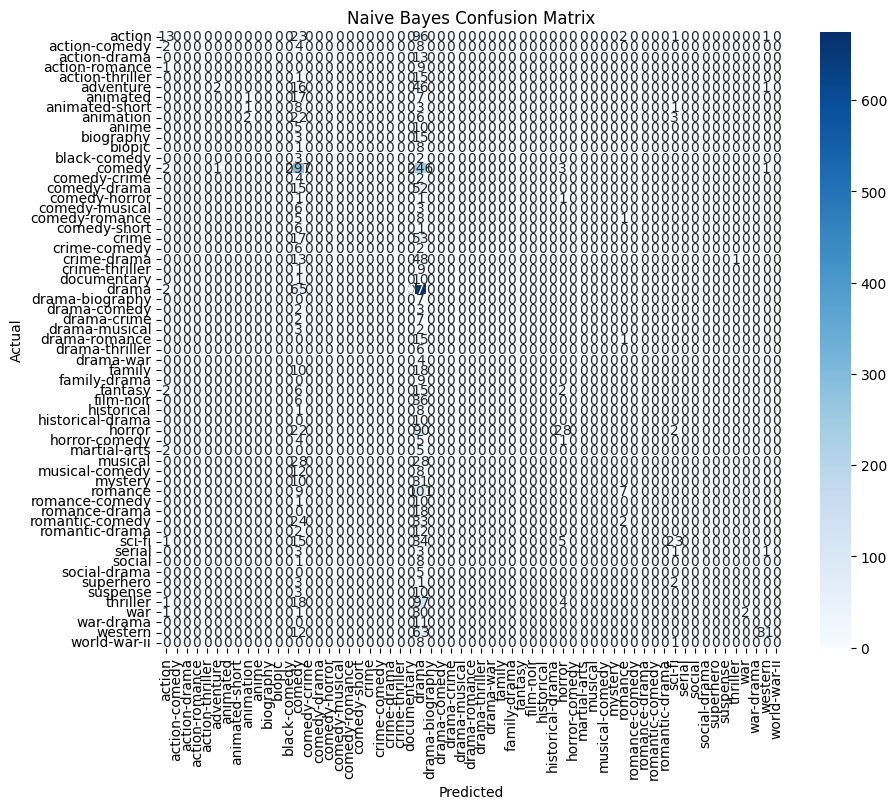

In [36]:
# Confusion matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=le.inverse_transform(unique_classes), yticklabels=le.inverse_transform(unique_classes))
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

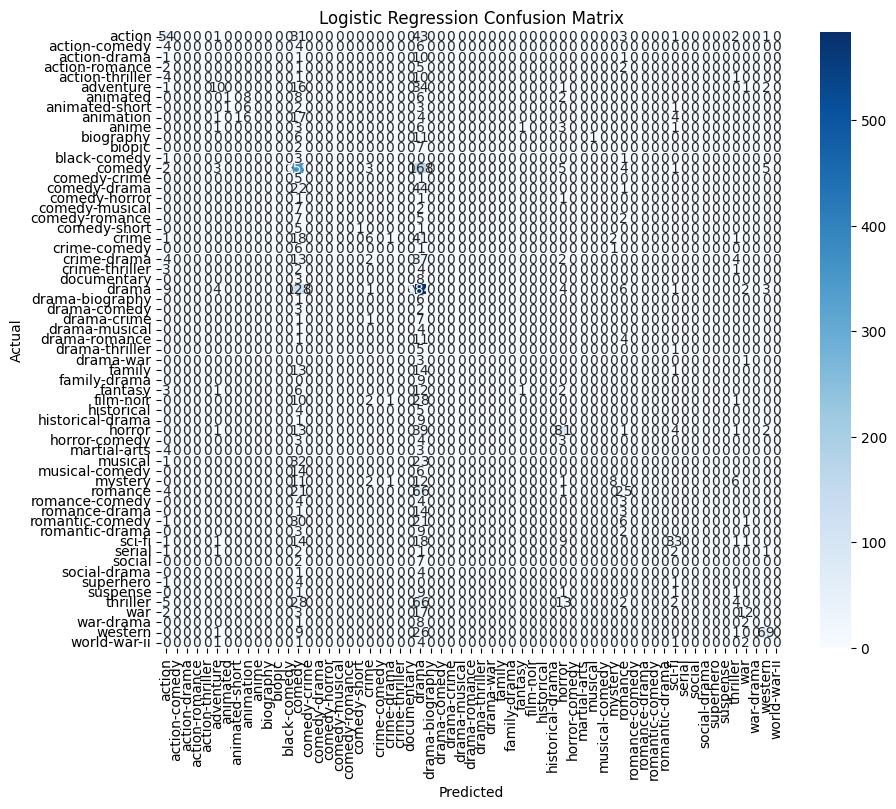

In [37]:
# Confusion matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

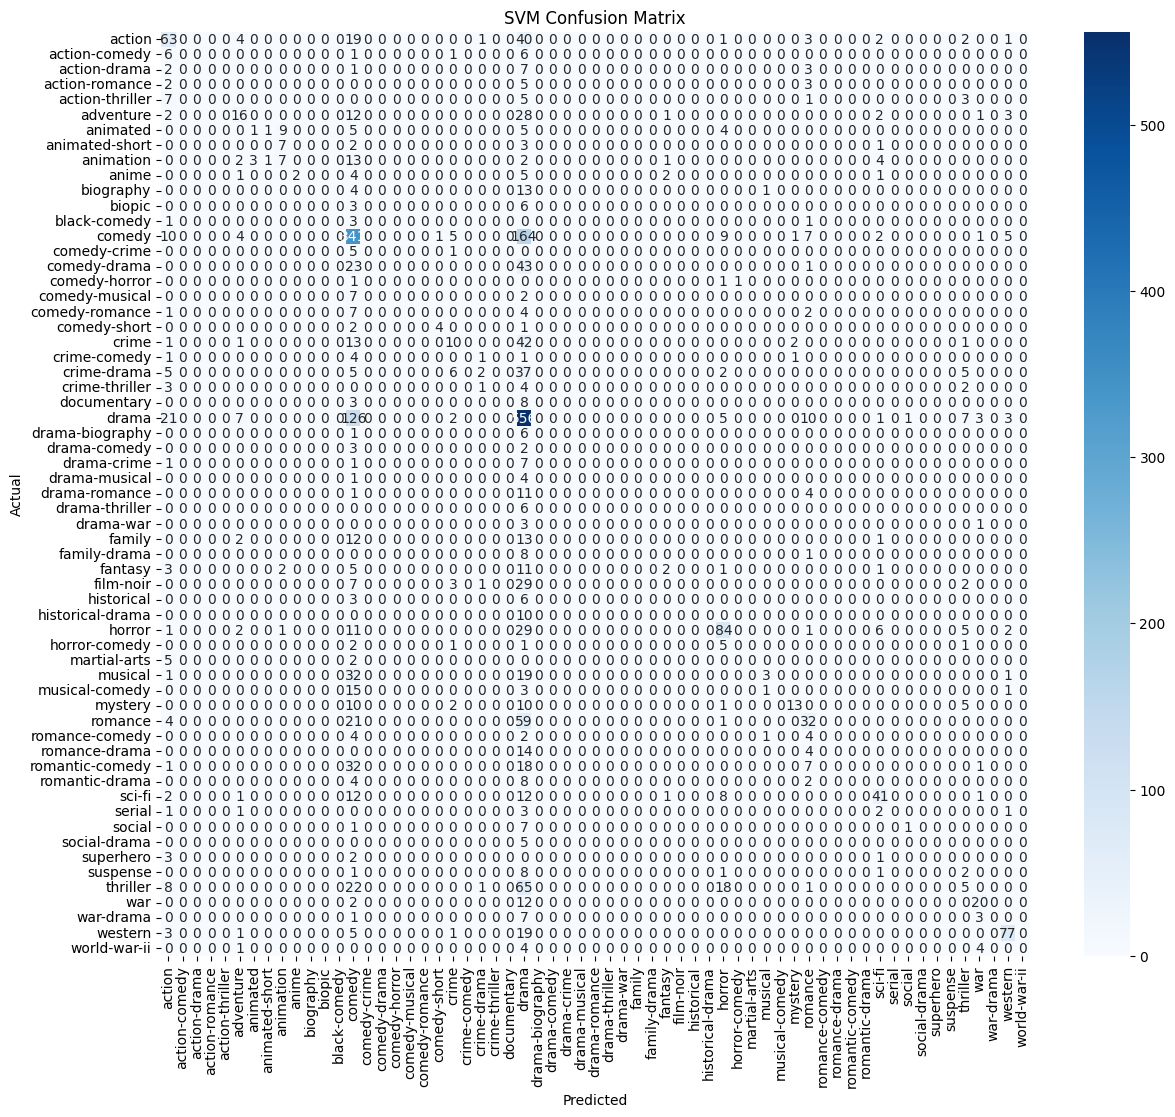

In [38]:
# Confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix
plt.figure(figsize=(14, 12))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=le.inverse_transform(unique_classes_lr), yticklabels=le.inverse_transform(unique_classes_lr))
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
import logging
import numpy as np
import torch
from sklearn.metrics import accuracy_score, classification_report
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup

# Ensure the availability of a GPU
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(f'Using device: {device}')

# Tokenization and encoding
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Creating datasets with proper train-test split
train_encodings = tokenizer(data_cleaned['cleaned_plot'].iloc[X_train.indices].tolist(), truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(data_cleaned['cleaned_plot'].iloc[X_test.indices].tolist(), truncation=True, padding=True, max_length=512)

train_dataset = TensorDataset(
    torch.tensor(train_encodings['input_ids']), 
    torch.tensor(train_encodings['attention_mask']), 
    torch.tensor(y_train)
)

test_dataset = TensorDataset(
    torch.tensor(test_encodings['input_ids']), 
    torch.tensor(test_encodings['attention_mask']), 
    torch.tensor(y_test)
)

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Define BERT model and move it to the specified device (GPU)
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(np.unique(y)))
model.to(device)

# Optimizer and scheduler
optimizer = AdamW(model.parameters(), lr=2e-5, weight_decay=0.01)
total_steps = len(train_loader) * 3  # Number of training epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=500, num_training_steps=total_steps)

# Setup logging
logging.basicConfig(level=logging.INFO)

# Training function
def train(model, train_loader, optimizer, scheduler, device):
    model.train()
    total_loss = 0
    for batch in train_loader:
        batch = [item.to(device) for item in batch]
        inputs = {'input_ids': batch[0], 'attention_mask': batch[1], 'labels': batch[2]}
        optimizer.zero_grad()
        outputs = model(**inputs)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        scheduler.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    return avg_loss

# Evaluation function
def evaluate(model, test_loader, device):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for batch in test_loader:
            batch = [item.to(device) for item in batch]
            inputs = {'input_ids': batch[0], 'attention_mask': batch[1], 'labels': batch[2]}
            outputs = model(**inputs)
            logits = outputs.logits
            preds = torch.argmax(logits, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(batch[2].cpu().numpy())
    accuracy = accuracy_score(all_labels, all_preds)
    report = classification_report(all_labels, all_preds, target_names=le.classes_)
    return accuracy, report

# Training loop
logging.info("Starting training...")
for epoch in range(3):  # Number of epochs
    avg_loss = train(model, train_loader, optimizer, scheduler, device)
    logging.info(f'Epoch {epoch+1}/{3} - Loss: {avg_loss}')
logging.info("Training complete.")

# Evaluate the model
logging.info("Starting evaluation...")
accuracy_bert, report_bert = evaluate(model, test_loader, device)
logging.info("Evaluation complete.")

print(f'BERT Accuracy: {accuracy_bert}')
print('BERT Classification Report:')
print(report_bert)


Using device: cuda
